In [10]:
import pandas as pd
import matplotlib
from common import clean_data, time_frame, time_frame_data
from urllib.request import urlopen
import plotly.graph_objects as go
from settings import *
import plotly.express as px
from models.base import BEA

#datasets = bea.meta.get_available_data_sets()
#parameters = bea.meta.get_available_parameters(dataset)['BEAAPI']['Results']
#parameter_values = bea.meta.get_parameter_values(dataset, parameter)

bea = BEA()
years = time_frame(25)
bea.meta.get_available_data_sets()

{'BEAAPI': {'Request': {'RequestParam': [{'ParameterName': 'USERID',
     'ParameterValue': '487A2E74-F753-4B15-B306-2FC3A0D95F09'},
    {'ParameterName': 'METHOD', 'ParameterValue': 'GETDATASETLIST'}]},
  'Results': {'Dataset': [{'DatasetName': 'NIPA',
     'DatasetDescription': 'Standard NIPA tables'},
    {'DatasetName': 'NIUnderlyingDetail',
     'DatasetDescription': 'Standard NI underlying detail tables'},
    {'DatasetName': 'MNE', 'DatasetDescription': 'Multinational Enterprises'},
    {'DatasetName': 'FixedAssets',
     'DatasetDescription': 'Standard Fixed Assets tables'},
    {'DatasetName': 'ITA',
     'DatasetDescription': 'International Transactions Accounts'},
    {'DatasetName': 'IIP',
     'DatasetDescription': 'International Investment Position'},
    {'DatasetName': 'InputOutput', 'DatasetDescription': 'Input-Output Data'},
    {'DatasetName': 'IntlServTrade',
     'DatasetDescription': 'International Services Trade'},
    {'DatasetName': 'GDPbyIndustry', 'DatasetDes

<AxesSubplot:xlabel='TimePeriod'>

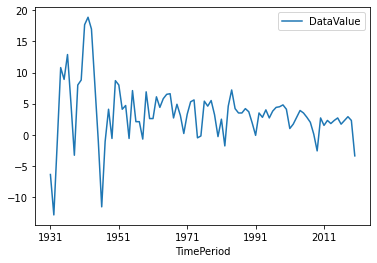

In [18]:
time_frame_data(bea.nipa, 'T10101', 90).plot.line(x='TimePeriod', y='DataValue')

In [4]:
bea.meta.

NameError: name 'x' is not defined

In [9]:
from models.base import BEA
bea.fixed_assets.show_dataset_tables()

[{'TableName': 'FAAt101',
  'Description': 'Table 1.1. Current-Cost Net Stock of Fixed Assets and Consumer Durable Goods (A)'},
 {'TableName': 'FAAt102',
  'Description': 'Table 1.2. Chain-Type Quantity Indexes for Net Stock of Fixed Assets and Consumer Durable Goods (A)'},
 {'TableName': 'FAAt103',
  'Description': 'Table 1.3. Current-Cost Depreciation of Fixed Assets and Consumer Durable Goods (A)'},
 {'TableName': 'FAAt104',
  'Description': 'Table 1.4. Chain-Type Quantity Indexes for Depreciation of Fixed Assets and Consumer Durable Goods (A)'},
 {'TableName': 'FAAt105',
  'Description': 'Table 1.5. Investment in Fixed Assets and Consumer Durable Goods (A)'},
 {'TableName': 'FAAt106',
  'Description': 'Table 1.6. Chain-Type Quantity Indexes for Investment in Fixed Assets and Consumer Durable Goods (A)'},
 {'TableName': 'FAAt107',
  'Description': 'Table 1.7. Current-Cost Other Changes in Volume of Assets for Fixed Assets and Consumer Durable Goods (A)'},
 {'TableName': 'FAAt108',
 

In [5]:
df = [{'key': 'value'}]
df
 

[{'key': 'value'}]

In [6]:
import pandas as pd
df = pd.DataFrame(df)


In [7]:
df

,key
0,value


In [9]:
df.iloc[0]

key    value
Name: 0, dtype: object